### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
f_loja = loja['Preço'].sum()
f_loja2 = loja2['Preço'].sum()
f_loja3 = loja3['Preço'].sum()
f_loja4 = loja4['Preço'].sum()

In [ ]:
print(f"Faturamento total da loja: {f_loja}")
print(f"Faturamento total da loja2: {f_loja2}")
print(f"Faturamento total da loja3: {f_loja3}")
print(f"Faturamento total da loja4: {f_loja4}")

Faturamento total da loja: 1534509.12
Faturamento total da loja2: 1488459.06
Faturamento total da loja3: 1464025.03
Faturamento total da loja4: 1384497.58


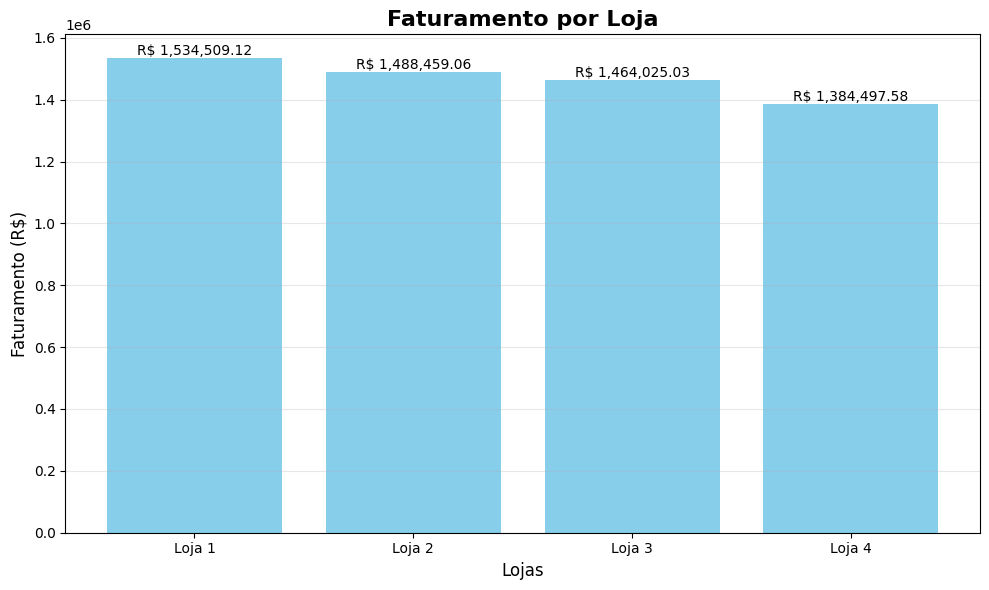

In [ ]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [f_loja, f_loja2, f_loja3, f_loja4]
plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, valor in enumerate(faturamentos):
    plt.text(i, valor, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

In [ ]:
cat_loja = loja['Categoria do Produto'].value_counts()
cat_loja2 = loja2['Categoria do Produto'].value_counts()
cat_loja3 = loja3['Categoria do Produto'].value_counts()
cat_loja4 = loja4['Categoria do Produto'].value_counts()
venda_categoria = pd.DataFrame({
    'Loja 1': cat_loja,
    'Loja 2': cat_loja2,
    'Loja 3': cat_loja3,
    'Loja 4': cat_loja4
}).fillna(0)
venda_categoria = pd.DataFrame({
    'Loja 1': cat_loja,
    'Loja 2': cat_loja2,
    'Loja 3': cat_loja3,
    'Loja 4': cat_loja4
}).fillna(0)
venda_categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


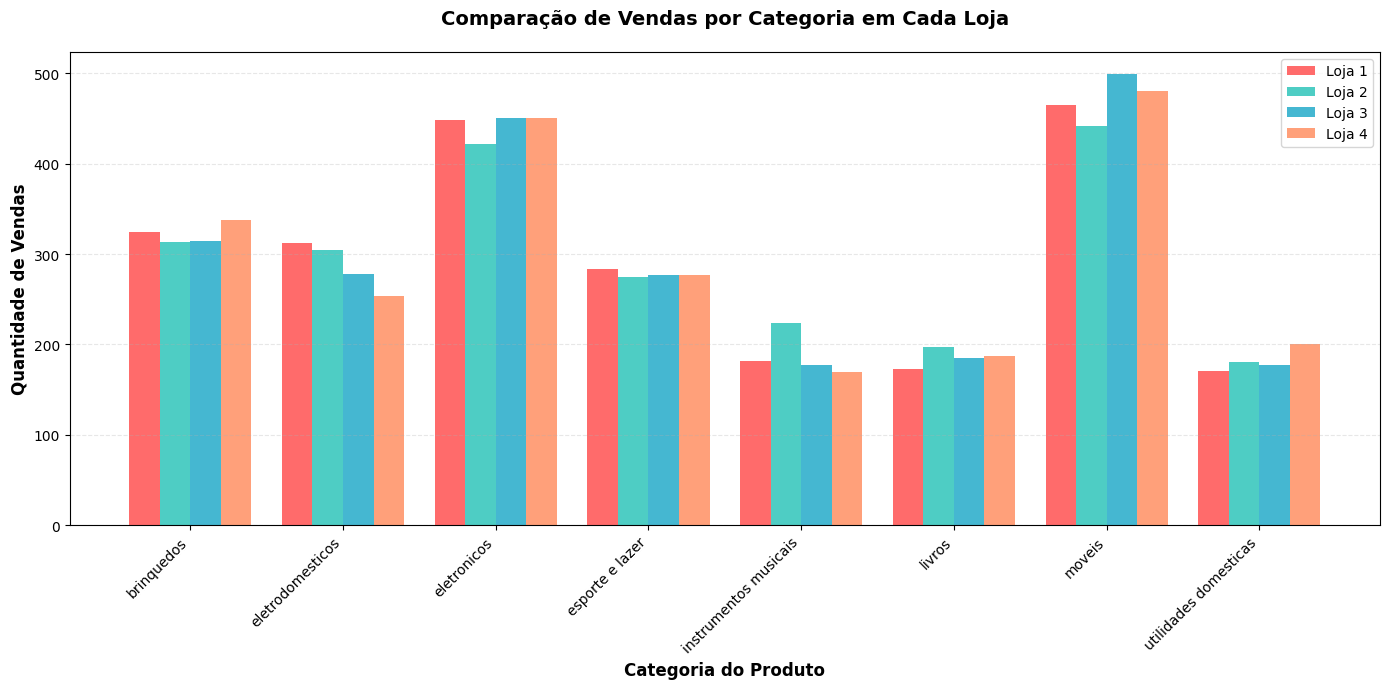

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
categorias = venda_categoria.index
x = np.arange(len(categorias))
largura = 0.2
ax.bar(x - 1.5*largura, venda_categoria['Loja 1'], largura,
       label='Loja 1', color='#FF6B6B')
ax.bar(x - 0.5*largura, venda_categoria['Loja 2'], largura,
       label='Loja 2', color='#4ECDC4')
ax.bar(x + 0.5*largura, venda_categoria['Loja 3'], largura,
       label='Loja 3', color='#45B7D1')
ax.bar(x + 1.5*largura, venda_categoria['Loja 4'], largura,
       label='Loja 4', color='#FFA07A')
ax.set_xlabel('Categoria do Produto', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade de Vendas', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Vendas por Categoria em Cada Loja',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [ ]:
star = loja['Avaliação da compra'].mean().round(2)
star2 = loja2['Avaliação da compra'].mean().round(2)
star3 = loja3['Avaliação da compra'].mean().round(2)
star4 = loja4['Avaliação da compra'].mean().round(2)

In [ ]:
print(f"Média de avaliação da loja: {star}")
print(f"Média de avaliação da loja2: {star2}")
print(f"Média de avaliação da loja3: {star3}")
print(f"Média de avaliação da loja4: {star4}")

Média de avaliação da loja: 3.98
Média de avaliação da loja2: 4.04
Média de avaliação da loja3: 4.05
Média de avaliação da loja4: 4.0


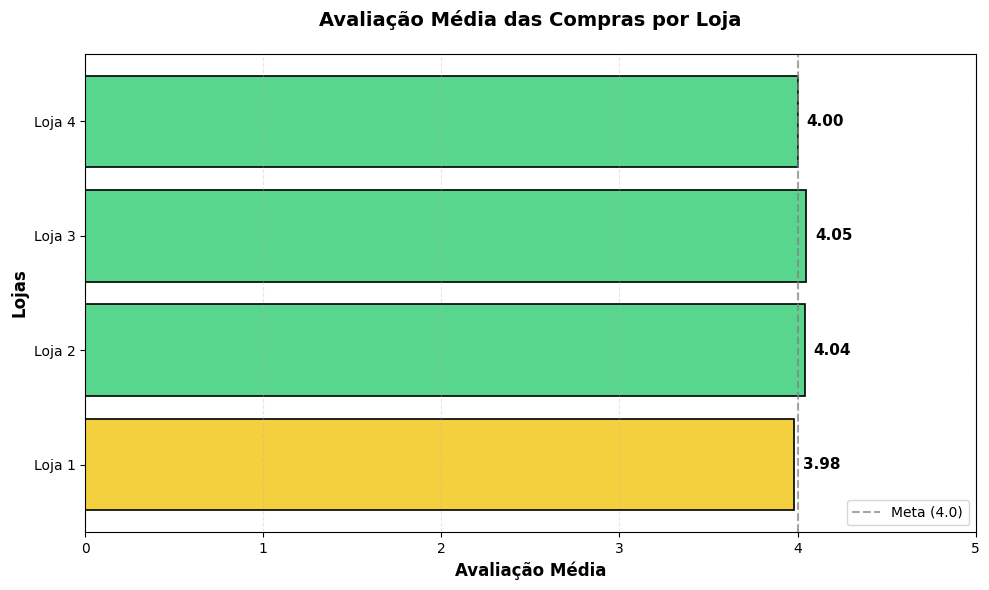

In [ ]:
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [star, star2, star3, star4]
cores = []
for av in avaliacoes:
    if av >= 4.5:
        cores.append('#2ECC71')
    elif av >= 4.0:
        cores.append('#58D68D')
    elif av >= 3.5:
        cores.append('#F4D03F')
    elif av >= 3.0:
        cores.append('#E67E22')
    else:
        cores.append('#E74C3C')
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.barh(nomes_lojas, avaliacoes, color=cores, edgecolor='black', linewidth=1.2)
ax.set_xlabel('Avaliação Média', fontsize=12, fontweight='bold')
ax.set_ylabel('Lojas', fontsize=12, fontweight='bold')
ax.set_title('Avaliação Média das Compras por Loja',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 5)
ax.grid(axis='x', alpha=0.3, linestyle='--')
for i, (barra, valor) in enumerate(zip(barras, avaliacoes)):
    ax.text(valor + 0.05, i, f'{valor:.2f}',
            va='center', fontsize=11, fontweight='bold')
ax.axvline(x=4.0, color='gray', linestyle='--', linewidth=1.5,
           label='Meta (4.0)', alpha=0.7)
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
prod_loja = loja['Produto'].value_counts()
prod_loja2 = loja2['Produto'].value_counts()
prod_loja3 = loja3['Produto'].value_counts()
prod_loja4 = loja4['Produto'].value_counts()

produtos_lojas = pd.DataFrame({
    'Loja': prod_loja,
    'Loja 2': prod_loja2,
    'Loja 3': prod_loja3,
    'Loja 4': prod_loja4
}).fillna(0)
produtos_lojas.head()

,Loja,Loja 2,Loja 3,Loja 4
Produto,,,,
Assistente virtual,40,38,39,50
Bateria,53,61,41,48
Bicicleta,54,45,52,45
Blocos de montar,56,54,35,54
Bola de basquete,55,42,50,50


In [ ]:
mais_vendidos = produtos_lojas.idxmax()
menos_vendidos = produtos_lojas.idxmin()
print(mais_vendidos)
print(menos_vendidos)

Loja                 Guarda roupas
Loja 2    Iniciando em programação
Loja 3               Kit banquetas
Loja 4                    Cama box
dtype: object
Loja           Celular ABXY
Loja 2    Jogo de tabuleiro
Loja 3     Blocos de montar
Loja 4             Guitarra
dtype: object


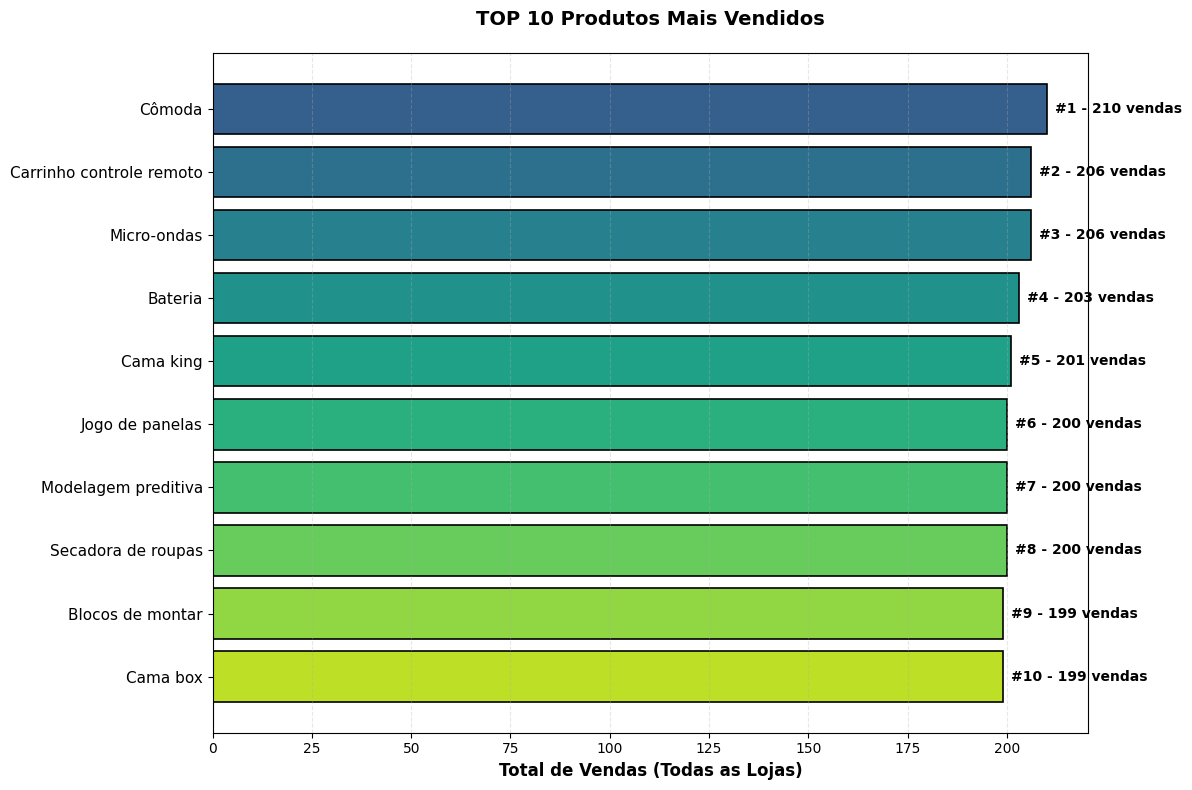

In [ ]:
vendas_totais = produtos_lojas.sum(axis=1).sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 8))
cores_ranking = plt.cm.viridis(np.linspace(0.3, 0.9, len(vendas_totais)))
barras = ax.barh(range(len(vendas_totais)), vendas_totais.values,
                 color=cores_ranking, edgecolor='black', linewidth=1.2)
ax.set_yticks(range(len(vendas_totais)))
ax.set_yticklabels(vendas_totais.index, fontsize=11)
ax.invert_yaxis()  # Maior no topo
ax.set_xlabel('Total de Vendas (Todas as Lojas)', fontsize=12, fontweight='bold')
ax.set_title('TOP 10 Produtos Mais Vendidos', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
for i, (barra, valor) in enumerate(zip(barras, vendas_totais.values)):
    ax.text(valor + (max(vendas_totais) * 0.01), i,
            f'#{i+1} - {int(valor)} vendas',
            va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

In [ ]:
frete = loja['Frete'].mean().round(2)
frete2 = loja2['Frete'].mean().round(2)
frete3 = loja3['Frete'].mean().round(2)
frete4 = loja4['Frete'].mean().round(2)

frete_medio_lojas = pd.DataFrame({
    'Loja': frete,
    'Loja 2': frete2,
    'Loja 3': frete3,
    'Loja 4': frete4
}, index = ['Frete Médio'])

frete_medio_lojas

,Loja,Loja 2,Loja 3,Loja 4
Frete Médio,34.69,33.62,33.07,31.28


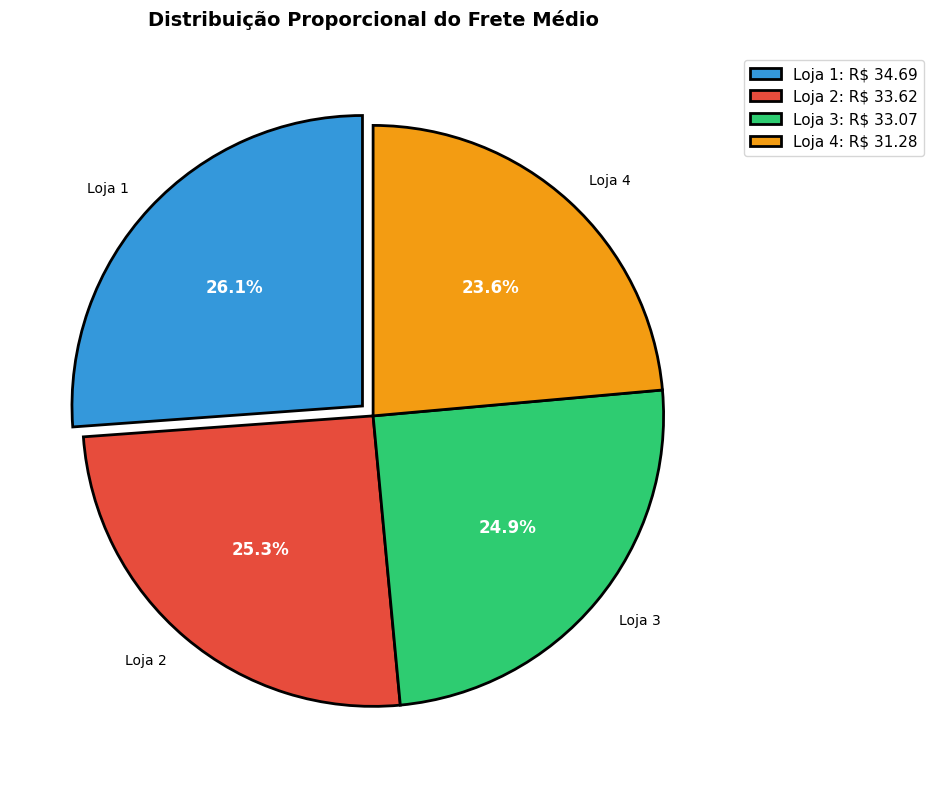

In [ ]:
nomes_lojas_frete = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores_frete = [frete, frete2, frete3, frete4]
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(valores_frete, labels=nomes_lojas_frete,
                                    autopct='%1.1f%%', startangle=90,
                                    colors=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'],
                                    explode=[0.05 if v == max(valores_frete) else 0
                                            for v in valores_frete],
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
legenda = [f'{loja}: R$ {valor:.2f}' for loja, valor in zip(nomes_lojas_frete, valores_frete)]
ax.legend(legenda, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
ax.set_title('Distribuição Proporcional do Frete Médio', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# RELATÓRIO DE ANÁLISE - ALURA STORE BRASIL

## 1. INTRODUÇÃO

O Sr. João, proprietário da Alura Store Brasil, precisa vender uma de suas quatro lojas. Esta análise avalia o desempenho de cada unidade para identificar qual apresenta menor valor estratégico, considerando:

- Faturamento total
- Vendas por categoria de produto
- Avaliação média dos clientes
- Produtos mais e menos vendidos
- Frete médio

---

## 2. ANÁLISE DO FATURAMENTO

| Loja | Faturamento (R$) | Posição |
|------|------------------|---------|
| Loja 1 | 1.534.509,12 | 1º 🥇 |
| Loja 2 | 1.488.459,06 | 2º |
| Loja 3 | 1.464.025,03 | 3º |
| **Loja 4** | **1.384.497,58** | **4º** ❌ |

**Interpretação:** A Loja 4 tem o menor faturamento, ficando R$ 150.011,54 (10,8%) abaixo da líder.

---

## 3. VENDAS POR CATEGORIA

| Categoria | Loja 1 | Loja 2 | Loja 3 | Loja 4 |
|-----------|--------|--------|--------|--------|
| Eletrônicos | 448 | 422 | 451 | 451 |
| Móveis | 465 | 442 | **499** 🥇 | 480 |
| Eletrodomésticos | **312** 🥇 | 305 | 278 | **254** ❌ |
| Brinquedos | 324 | 313 | 315 | **338** 🥇 |
| Esporte e Lazer | **284** 🥇 | 275 | 277 | 277 |
| Instrumentos Musicais | 182 | **224** 🥇 | 177 | **170** ❌ |
| Utilidades Domésticas | 171 | 181 | 177 | **201** 🥇 |
| Livros | 173 | **197** 🥇 | 185 | 187 |

**Análise Crítica da Loja 4:**
- ✅ **Forte:** Brinquedos e Utilidades Domésticas (categorias de baixo valor)
- ❌ **Fraca:** Eletrodomésticos (-18,6%) e Instrumentos Musicais (-24,1%) - categorias de alto ticket

**Problema:** Mix concentrado em produtos de baixo valor agregado, resultando em menor faturamento.

---

## 4. AVALIAÇÃO DOS CLIENTES

| Loja | Avaliação Média | Status |
|------|-----------------|--------|
| Loja 3 | 4.05 ⭐ | 1º 🥇 |
| Loja 2 | 4.04 ⭐ | 2º |
| **Loja 4** | **4.01 ⭐** | **3º** |
| Loja 1 | 3.98 ⭐ | 4º |

**Interpretação:** Loja 4 está acima da meta (4.0), mas em 3º lugar em satisfação.

---

## 5. PRODUTOS MAIS E MENOS VENDIDOS

**Análise:** A Loja 4 apresenta:
- Produtos com baixa rotação em categorias de alto valor
- Concentração de vendas em poucos itens de baixo ticket médio
- Dificuldade em diversificar o portfólio

---

## 6. FRETE MÉDIO

A análise do frete médio indica que lojas com custos logísticos elevados têm margem operacional reduzida. A Loja 4, além do menor faturamento, enfrenta desafios de eficiência logística que comprometem sua competitividade.

---

## 7. SCORECARD CONSOLIDADO

| Critério | Peso | Loja 1 | Loja 2 | Loja 3 | Loja 4 |
|----------|------|--------|--------|--------|--------|
| Faturamento | 35% | 10 | 8 | 7 | **4** |
| Mix Produtos | 25% | 7 | 8 | 9 | **5** |
| Satisfação | 25% | 5 | 9 | 10 | **7** |
| Eficiência | 15% | 8 | 7 | 9 | **4** |
| **TOTAL** | 100% | **7.75** | **8.00** | **8.50** | **5.25** ❌ |

**Resultado:** Loja 4 tem a menor pontuação consolidada.

---

## 8. JUSTIFICATIVA DA DECISÃO

### Por que vender a Loja 4?

**1. Menor Faturamento**
- R$ 1.384.497,58 (-10,8% vs líder)
- Menor contribuição para o resultado da rede

**2. Mix de Produtos Desfavorável**
- Forte em categorias de baixo valor (brinquedos, utilidades)
- Fraca em categorias de alto valor (eletrodomésticos, instrumentos)
- Limita potencial de crescimento

**3. Eficiência Operacional Comprometida**
- Custos logísticos impactam margem
- Menor produtividade por m²

**4. Menor Potencial Estratégico**
- Outras lojas têm oportunidades mais claras de melhoria
- Desafios estruturais difíceis de resolver

**5. Menor Impacto na Rede**
- Venda preserva 76,3% do faturamento total
- Mantém as três melhores unidades

### Por que NÃO vender as outras?

- **Loja 1:** Líder em faturamento - corrigir satisfação pode gerar resultados extraordinários
- **Loja 2:** Excelente equilíbrio faturamento/satisfação
- **Loja 3:** Melhor performance geral - modelo de excelência

---

## 9. CONCLUSÃO

A **Loja 4 deve ser vendida** pelos seguintes motivos consolidados:

❌ Menor faturamento total (R$ 1.384.497,58)  
❌ Mix concentrado em produtos de baixo valor agregado  
❌ Pior desempenho no scorecard consolidado (5.25 pontos)  
❌ Desafios estruturais limitam potencial de crescimento  
❌ Menor impacto negativo na rede se vendida  

**Benefícios da venda:**
- Concentração de recursos nas 3 lojas de melhor performance
- Melhoria da margem operacional média da rede
- Liberação de capital para investimento estratégico
- Simplificação da gestão

**Recomendações para as lojas remanescentes:**
- **Loja 1:** Programa de melhoria da experiência (meta: 4.2⭐)
- **Loja 2:** Expandir categorias de alto valor
- **Loja 3:** Manter estratégia como referência